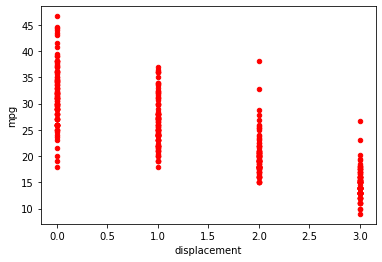

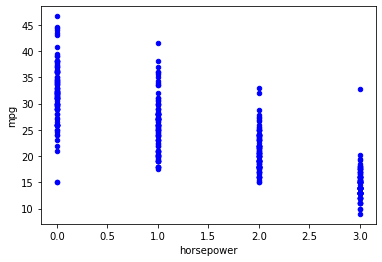

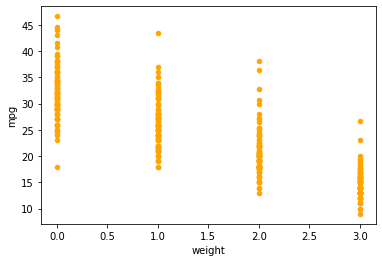

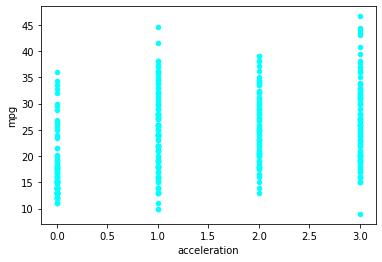

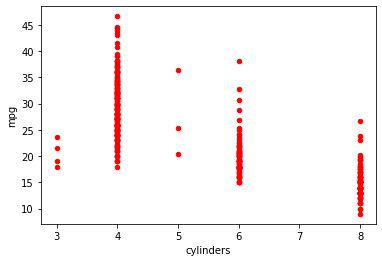

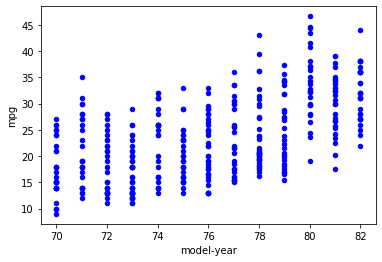

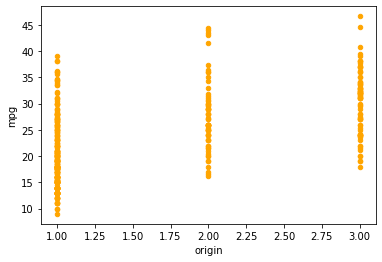

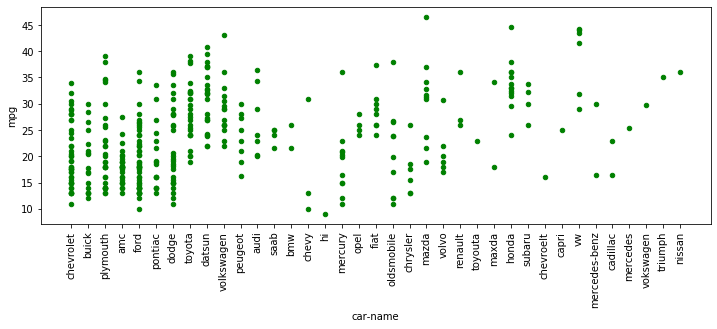

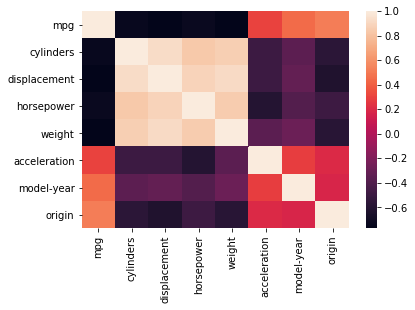

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from assignment1_Finn import *

In [2]:
DataFrame.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,0,8,3,3,2,0,70,1,chevrolet
1,0,8,3,3,3,0,70,1,buick
2,0,8,3,3,2,0,70,1,plymouth
3,0,8,3,3,2,0,70,1,amc
4,0,8,3,3,2,0,70,1,ford
5,0,8,3,3,3,0,70,1,ford
6,0,8,3,3,3,0,70,1,chevrolet
7,0,8,3,3,3,0,70,1,plymouth
8,0,8,3,3,3,0,70,1,pontiac
9,0,8,3,3,3,0,70,1,amc


In [3]:
class NaiveBayes:
    
    
    def fit(self, X, y):
        # gets number of samples, number of features
        n_samples, n_features = X.shape
        # gets classes, then # of classes
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        #init mean, var, priors
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros((n_classes))
        
        for c in self._classes:
            X_c = X[c==y]
            self._mean[c,:] = X_c.mean(axis=0)
            self._var[c,:] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_predict = [self._predict(x) for x in X]
        return y_predict
    
    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    
    def evaluate_acc(self, true_y, target_y):
        return (np.sum(true_y == target_y) / len(true_y))


In [9]:
def kFoldCrossVal(k, X, y):
    accuracy = 0
    model = NaiveBayes()
    size = (int)(len(y)/k)
    for i in range(k):
        train_x = X[np.r_[0:size*i, size*(i+1):]]
        train_y = y[np.r_[0:size*i, size*(i+1):]]
        test_x = X[(i*size):size*(i+1)]
        test_y = y[(i*size):size*(i+1)]
        
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        run_accuracy = model.evaluate_acc(test_y, predictions)
        accuracy = accuracy + run_accuracy
        print(run_accuracy)

    return accuracy / k

features = DataFrame.drop(['mpg', 'car-name', 'cylinders', 'displacement', 'horsepower'] , axis=1)
X = features.values
output = DataFrame['mpg']
Y = output.values

kFoldCrossVal(5, X, Y)


0.9230769230769231
0.8974358974358975
0.9102564102564102
0.8076923076923077
0.9102564102564102


0.8897435897435898